### Data Understanding and Exploration


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
house = pd.read_csv("train.csv")

In [3]:
# summary of the dataset
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# head
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house.shape

(1460, 81)

In [6]:
# column-wise null count here
null_columns=house.columns[house.isnull().any()]
round(100*(house[null_columns].isnull().sum()/len(house[null_columns].index)),2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [7]:
# we will drop the columns having more than 60% NA values.
house = house.drop(house.loc[:,list(round(100*(house.isnull().sum()/len(house.index)), 2)>60)].columns, 1)

In [8]:
house.FireplaceQu.describe()

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

In [9]:
house.loc[pd.isnull(house['FireplaceQu']), ['FireplaceQu']] = 'Gd'

In [10]:
house.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [11]:
house = house[~np.isnan(house['LotFrontage'])]
house = house[~np.isnan(house['MasVnrArea'])]
house = house[~np.isnan(house['GarageYrBlt'])]


In [12]:
house.SalePrice.describe()

count      1121.000000
mean     185506.152542
std       82999.159004
min       35311.000000
25%      131000.000000
50%      164900.000000
75%      219500.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Data Understanding

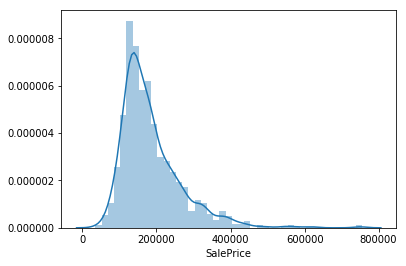

1.93361501241


In [13]:
#SalePrice
sns.distplot(house['SalePrice'])
plt.show()

print(house['SalePrice'].skew())

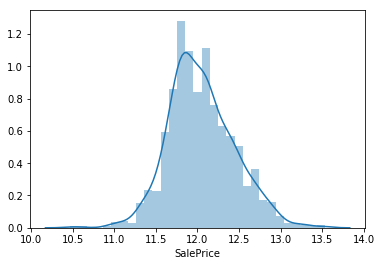

0.317477823649


In [14]:
#Taking log of saleprice and plotting it
sns.distplot(np.log(house['SalePrice']))
plt.show()

print (np.log(house['SalePrice']).skew())

### EDA

In [15]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [16]:
# correlation matrix
cor = house_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.021937,-0.013289,-0.040711,-0.058269,0.004387,-0.020862,-0.027664,-0.073472,-0.013751,...,-0.025060,-0.001972,0.009935,-0.066833,0.015183,0.048010,0.045799,-0.000570,0.013407,-0.047122
MSSubClass,0.021937,1.000000,-0.386940,-0.198096,0.029522,-0.087859,0.025800,0.006645,0.040240,-0.070389,...,-0.017988,0.004054,-0.017790,-0.039739,-0.021789,0.003166,-0.040689,-0.027170,-0.012448,-0.088032
LotFrontage,-0.013289,-0.386940,1.000000,0.421184,0.241322,-0.046312,0.109726,0.086414,0.189969,0.241352,...,0.082166,0.161815,0.014261,0.069716,0.035906,0.211746,0.001471,0.018815,0.013267,0.344270
LotArea,-0.040711,-0.198096,0.421184,1.000000,0.167525,-0.034348,0.029205,0.026848,0.106115,0.230441,...,0.133576,0.099170,-0.023631,0.012520,0.072517,0.109147,0.012790,0.008998,-0.006904,0.299962
OverallQual,-0.058269,0.029522,0.241322,0.167525,1.000000,-0.163157,0.589385,0.570757,0.423988,0.249500,...,0.282512,0.340679,-0.144344,0.017331,0.055296,0.080131,-0.062064,0.079895,-0.008903,0.797881
OverallCond,0.004387,-0.087859,-0.046312,-0.034348,-0.163157,1.000000,-0.426462,0.039402,-0.166762,-0.054788,...,-0.010835,-0.076273,0.062748,-0.006861,0.087030,-0.023566,0.119772,-0.014236,0.041003,-0.124391
YearBuilt,-0.020862,0.025800,0.109726,0.029205,0.589385,-0.426462,1.000000,0.623171,0.332190,0.236941,...,0.238548,0.235432,-0.392693,0.027948,-0.063694,0.006717,-0.096973,0.013784,-0.004585,0.525394
YearRemodAdd,-0.027664,0.006645,0.086414,0.026848,0.570757,0.039402,0.623171,1.000000,0.193376,0.120774,...,0.244602,0.260521,-0.214115,0.026304,-0.034288,0.019307,-0.040420,0.026884,0.041302,0.521253
MasVnrArea,-0.073472,0.040240,0.189969,0.106115,0.423988,-0.166762,0.332190,0.193376,1.000000,0.285331,...,0.174649,0.129532,-0.116832,0.022331,0.052646,0.021648,-0.054044,0.015850,-0.017569,0.488658
BsmtFinSF1,-0.013751,-0.070389,0.241352,0.230441,0.249500,-0.054788,0.236941,0.120774,0.285331,1.000000,...,0.206246,0.127900,-0.105410,0.021831,0.059635,0.194349,0.003027,-0.015281,0.010224,0.390301


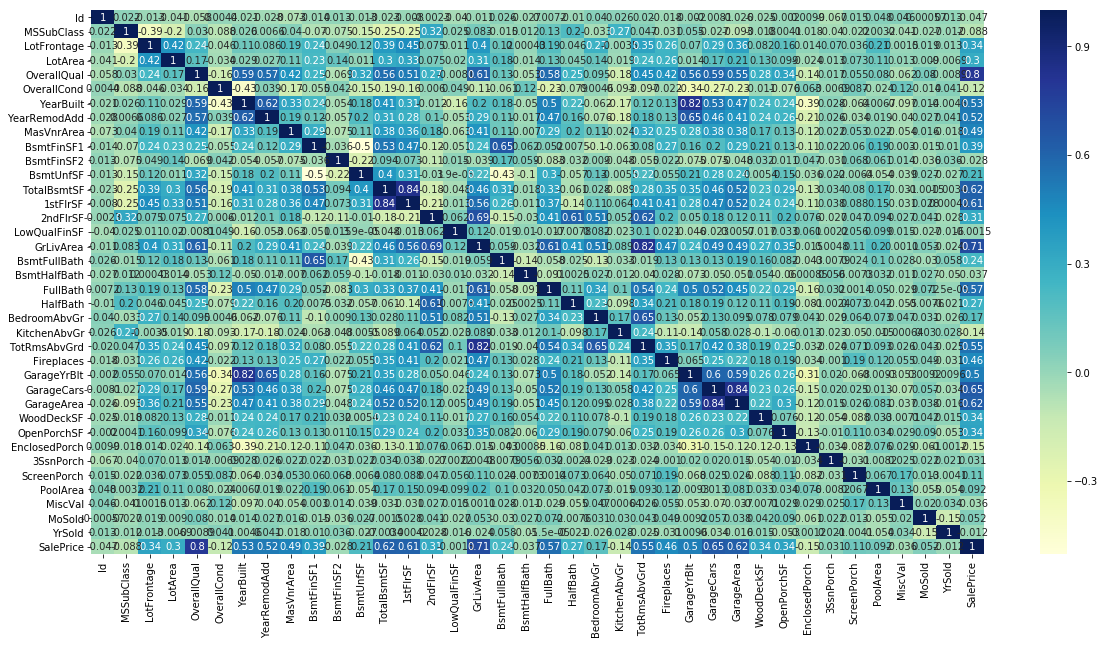

In [17]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(20,10))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [18]:
print (cor['SalePrice'].sort_values(ascending=False)[:5], '\n') 
print (cor['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.797881
GrLivArea      0.705154
GarageCars     0.647034
GarageArea     0.619330
Name: SalePrice, dtype: float64 

Id              -0.047122
MSSubClass      -0.088032
OverallCond     -0.124391
KitchenAbvGr    -0.140497
EnclosedPorch   -0.154843
Name: SalePrice, dtype: float64


In [19]:
house_numeric.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  2], dtype=int64)

In [20]:
#check the mean price per quality
qual_pivot = house_numeric.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
qual_pivot

,SalePrice
OverallQual,
2,47655.5
3,93500.0
4,108729.5
5,132500.0
6,157900.0
7,200000.0
8,270000.0
9,347500.0
10,414430.5


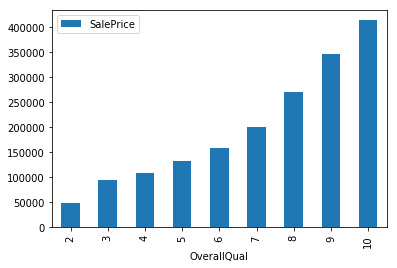

In [21]:
#Mean price per quality plot
qual_pivot.plot(kind='bar')
plt.show()

# we see that the sales price increases as Overall Quaity increases

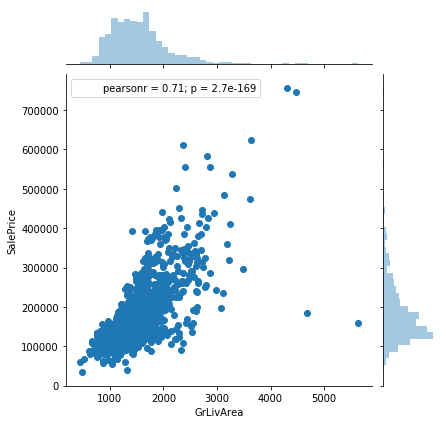

In [22]:
# Let us check GrLivArea
sns.jointplot(x=house_numeric['GrLivArea'], y=house_numeric['SalePrice'])
plt.show()

#Increase in living area is directly proportional to the sale price.

In [23]:
# Let us remove the outliers
house = house[house['GrLivArea'] < 4000]


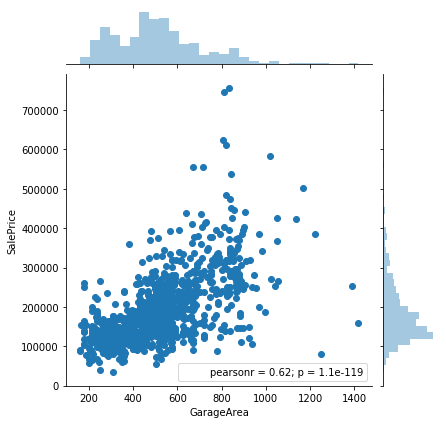

In [24]:
# Let us check GarageArea     
sns.jointplot(x=house_numeric['GarageArea'], y=house_numeric['SalePrice'])
plt.show()

In [25]:
# Let us remove the outliers
house = house[house['GarageArea'] < 1200]

In [26]:
null = pd.DataFrame(house.isnull().sum().sort_values(ascending=False)[:25])
null.columns = ['Null Count']
null.head()

,Null Count
BsmtFinType2,25
BsmtExposure,25
BsmtQual,24
BsmtFinType1,24
BsmtCond,24


In [27]:
#Based on sale condition
salecondition_pivot = house.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
salecondition_pivot

,SalePrice
SaleCondition,
Abnorml,127450
AdjLand,126000
Alloca,118964
Family,140500
Normal,159500
Partial,248328


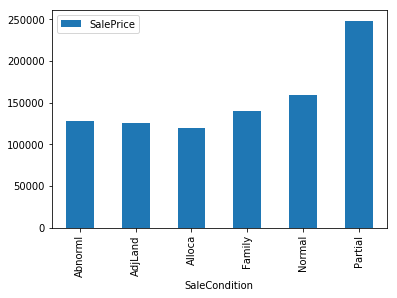

In [28]:
salecondition_pivot.plot(kind='bar')
plt.show()

### Data Preparation

In [29]:
house_categoricals = house.select_dtypes(exclude=[np.number])
house_categoricals

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,WD,Normal
10,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal


In [30]:
# split into X and y
X = house.drop(['SalePrice', 'Id'], axis=1)
y = np.log(house.SalePrice)

In [31]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [32]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [34]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [35]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=225)

In [36]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Model Building and Evaluation

#### Ridge Regression

In [37]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [38]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.015322,0.001207,-0.085708,-0.051931,0.0001,{'alpha': 0.0001},26,-0.085345,-0.050275,-0.078156,...,-0.091246,-0.052483,-0.099177,-0.049785,-0.074546,-0.053302,0.001577,0.001478,0.008872,0.001616
1,0.009298,0.000802,-0.085706,-0.051931,0.001,{'alpha': 0.001},25,-0.085343,-0.050275,-0.078154,...,-0.091245,-0.052483,-0.099171,-0.049785,-0.074545,-0.053302,0.003412,0.000401,0.008871,0.001616
2,0.014196,0.000401,-0.085680,-0.051932,0.01,{'alpha': 0.01},24,-0.085322,-0.050274,-0.078137,...,-0.091227,-0.052483,-0.099118,-0.049787,-0.074527,-0.053301,0.001390,0.000491,0.008860,0.001616
3,0.009410,0.001385,-0.085574,-0.051934,0.05,{'alpha': 0.05},23,-0.085235,-0.050271,-0.078065,...,-0.091154,-0.052481,-0.098892,-0.049795,-0.074453,-0.053299,0.002014,0.001495,0.008813,0.001617
4,0.010409,0.001449,-0.085452,-0.051937,0.1,{'alpha': 0.1},22,-0.085135,-0.050267,-0.077989,...,-0.091070,-0.052479,-0.098632,-0.049801,-0.074363,-0.053300,0.002549,0.001462,0.008761,0.001620


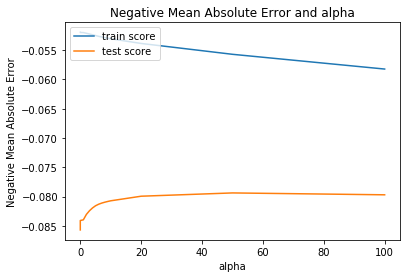

In [39]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [40]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ -2.02786632e-03,   7.78377173e-03,   4.60192426e-02,
         4.75338456e-02,   4.46170204e-02,   3.33264860e-02,
         1.12869987e-02,   6.87151704e-04,   2.56658388e-02,
         3.43240583e-03,   6.76846023e-03,   3.58981004e-02,
         4.65925713e-02,   2.46623825e-02,   2.94656765e-04,
         5.66779394e-02,   1.40151680e-02,   3.44525348e-03,
         1.59356561e-02,   1.78005843e-02,  -4.41053246e-03,
        -1.75404640e-02,   1.03785221e-02,   1.76957884e-02,
         1.68793501e-03,   8.81034655e-03,   2.97008269e-02,
         1.28616908e-02,   1.32075660e-02,   2.26601599e-03,
         1.06281028e-02,   3.99151678e-03,   4.42771711e-03,
         8.47972517e-05,   3.83825093e-03,  -3.37758792e-04,
         3.63874918e-02,   1.18460420e-02,   4.68118569e-02,
         2.75858862e-02,   1.29009999e-02,  -1.54482421e-03,
         2.38835620e-04,  -5.48875066e-04,  -6.60070132e-03,
        -1.05461909e-02,  -9.41916335e-03,   6.00538797e-03,
        -8.67619325e-03,

#### Lasso

In [41]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [42]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.135548,0.000000,-0.083046,-0.052071,0.0001,{'alpha': 0.0001},2,-0.084282,-0.050388,-0.075587,...,-0.088561,-0.052379,-0.094492,-0.049934,-0.072238,-0.053459,0.016913,0.000000,0.008187,0.001669
1,0.039018,0.000407,-0.078884,-0.055764,0.001,{'alpha': 0.001},1,-0.082051,-0.054611,-0.072828,...,-0.084750,-0.055813,-0.082916,-0.053951,-0.071829,-0.057420,0.001528,0.000499,0.005422,0.001338
2,0.011128,0.000418,-0.084992,-0.076791,0.01,{'alpha': 0.01},3,-0.086452,-0.075758,-0.077618,...,-0.095807,-0.076059,-0.080090,-0.076731,-0.084994,-0.077664,0.001399,0.000513,0.006289,0.000809
3,0.010213,0.000201,-0.117431,-0.114322,0.05,{'alpha': 0.05},4,-0.118685,-0.114937,-0.101407,...,-0.137004,-0.115075,-0.115604,-0.113510,-0.114434,-0.114475,0.001205,0.000402,0.011442,0.000653
4,0.009178,0.000689,-0.156185,-0.152849,0.1,{'alpha': 0.1},5,-0.161809,-0.152266,-0.131079,...,-0.184538,-0.153472,-0.146466,-0.151330,-0.157036,-0.154362,0.001393,0.000423,0.017681,0.001032


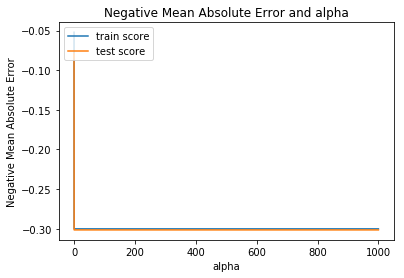

In [43]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [44]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
lasso.coef_

array([-0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
        0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0.,
       -0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
       -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,
       -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,
        0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0., -0.,
       -0.,  0., -0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,
        0., -0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,  0., -0.,  0.,
        0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0., -0., -0.,
        0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,
       -0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,  0.,
        0.,  0.,  0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0., -0.,
        0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0